<a href="https://colab.research.google.com/github/farros123/RME/blob/main/AQI_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('drive/MyDrive/MachineLearning/AQI and Lat Long of Countries.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
df.columns = ['Country','City','AQI_value','AQI_category','CO_AQI_value','CO_AQI_category','Ozone_AQI_value','Ozone_AQI_category','NO2_AQI_value','NO2_AQI_category','PM2.5_AQI_value','PM2.5_AQI_category','lat','lng']

In [ ]:
df.head()

,Country,City,AQI_value,AQI_category,CO_AQI_value,CO_AQI_category,Ozone_AQI_value,Ozone_AQI_category,NO2_AQI_value,NO2_AQI_category,PM2.5_AQI_value,PM2.5_AQI_category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
df.isnull().sum()

Country               302
City                    0
AQI_value               0
AQI_category            0
CO_AQI_value            0
CO_AQI_category         0
Ozone_AQI_value         0
Ozone_AQI_category      0
NO2_AQI_value           0
NO2_AQI_category        0
PM2.5_AQI_value         0
PM2.5_AQI_category      0
lat                     0
lng                     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Country               0
City                  0
AQI_value             0
AQI_category          0
CO_AQI_value          0
CO_AQI_category       0
Ozone_AQI_value       0
Ozone_AQI_category    0
NO2_AQI_value         0
NO2_AQI_category      0
PM2.5_AQI_value       0
PM2.5_AQI_category    0
lat                   0
lng                   0
dtype: int64

In [ ]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [ ]:
df[df.duplicated(subset=['City'])]

,Country,City,AQI_value,AQI_category,CO_AQI_value,CO_AQI_category,Ozone_AQI_value,Ozone_AQI_category,NO2_AQI_value,NO2_AQI_category,PM2.5_AQI_value,PM2.5_AQI_category,lat,lng
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513
21,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate,40.8894,-88.6409
34,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good,39.2592,-119.5653
35,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good,30.0315,-94.9158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16647,United States of America,Salina,51,Moderate,1,Good,34,Good,1,Good,51,Moderate,43.1023,-76.1768
16672,United States of America,Union,51,Moderate,1,Good,47,Good,2,Good,51,Moderate,42.1258,-76.0329
16673,United States of America,Union,51,Moderate,1,Good,47,Good,2,Good,51,Moderate,38.4399,-90.9927
16685,Colombia,Viterbo,55,Moderate,1,Good,24,Good,0,Good,55,Moderate,5.0667,-75.8833


In [ ]:
df.drop_duplicates(subset='City', inplace=True)
df

,Country,City,AQI_value,AQI_category,CO_AQI_value,CO_AQI_category,Ozone_AQI_value,Ozone_AQI_category,NO2_AQI_value,NO2_AQI_category,PM2.5_AQI_value,PM2.5_AQI_category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16689,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,24.8011,113.5927
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [ ]:
df.describe()

,AQI_value,CO_AQI_value,Ozone_AQI_value,NO2_AQI_value,PM2.5_AQI_value,lat,lng
count,14229.000000,14229.000000,14229.000000,14229.000000,14229.000000,14229.000000,14229.000000
mean,62.975824,1.317450,32.532645,3.491812,59.624359,30.869726,1.009732
std,43.313057,1.970172,23.285521,5.634884,43.448684,23.042552,70.461845
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.000000,1.000000,21.000000,0.000000,34.000000,17.769400,-71.515700
50%,52.000000,1.000000,30.000000,1.000000,51.000000,39.235800,8.130000
75%,69.000000,1.000000,38.000000,4.000000,68.000000,48.100000,37.833300
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [ ]:
df[['Country', 'City', 'AQI_value',]].nsmallest(10,'AQI_value')

,Country,City,AQI_value
6610,Ecuador,Macas,7
10496,Ecuador,Azogues,8
16559,Papua New Guinea,Tari,8
5451,Peru,Huaraz,9
2615,Ecuador,Nueva Loja,10
5654,Peru,Huancavelica,10
6884,Indonesia,Manokwari,10
3585,Peru,Puquio,11
4051,Argentina,Comodoro Rivadavia,11
6832,Papua New Guinea,Mendi,11


In [ ]:
df[['Country', 'City', 'AQI_value']].nlargest(10,'AQI_value')

,Country,City,AQI_value
203,Pakistan,Bahawalnagar,500
445,Pakistan,Harunabad,500
578,India,Mahendragarh,500
1623,India,Phalodi,500
1808,India,Jodhpur,500
3750,India,Delhi,500
3768,United States of America,Durango,500
3853,India,Nohar,500
5097,India,Nawalgarh,500
5208,India,Rohtak,500


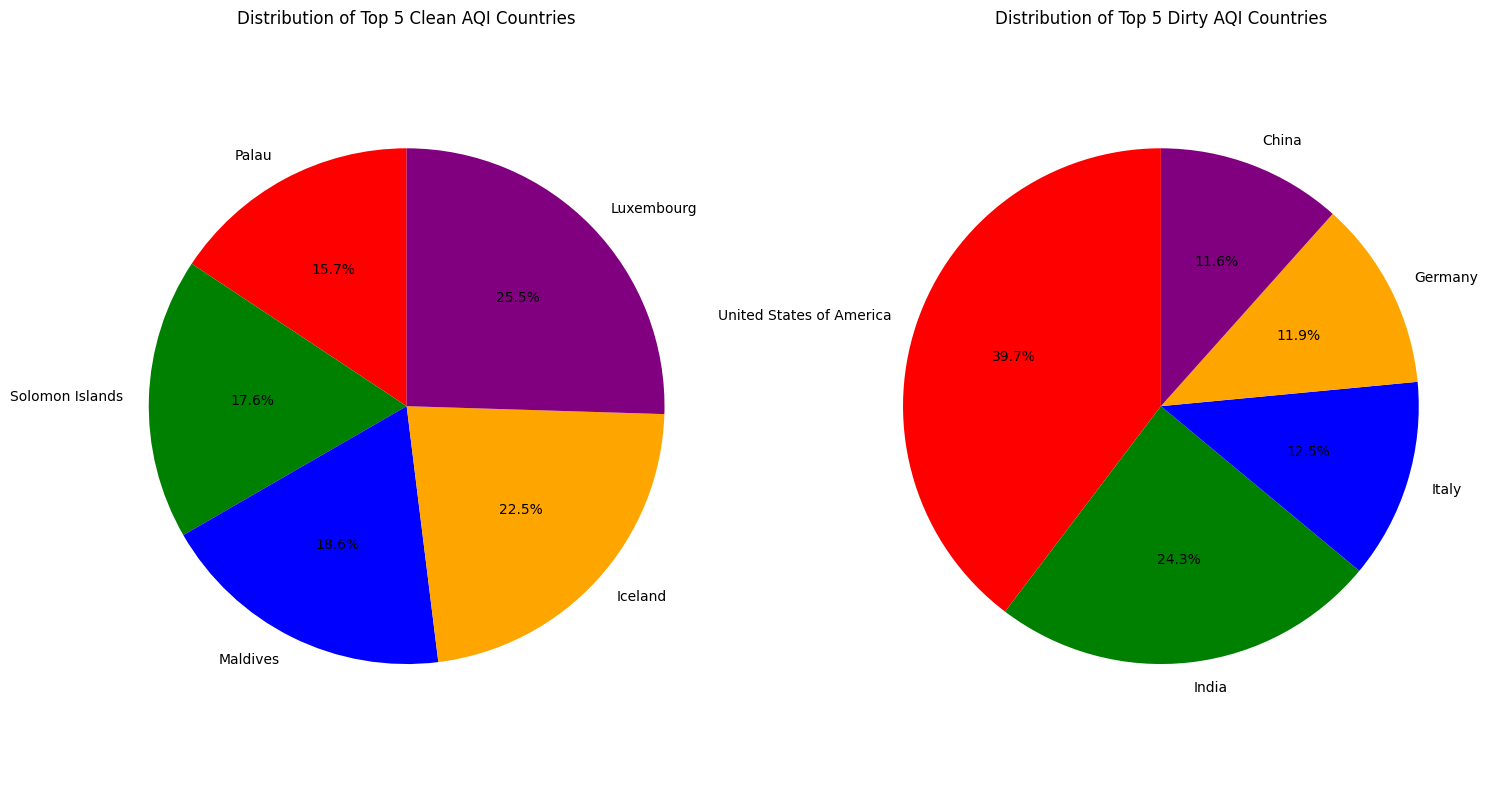

In [ ]:
top_AQI_sum_clean_countries_df = df.groupby('Country', as_index=False).agg({'AQI_value':'sum'}).nsmallest(5, "AQI_value")
top_AQI_sum_dirtiest_countries_df = df.groupby('Country', as_index=False).agg({'AQI_value':'sum'}).nlargest(5, "AQI_value")

fig, (p1, p2) = plt.subplots(1, 2, figsize=(15, 8))

p1.pie(top_AQI_sum_clean_countries_df['AQI_value'], labels=top_AQI_sum_clean_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange', 'purple'])
p1.axis('equal')
p1.set_title('Distribution of Top 5 Clean AQI Countries')

p2.pie(top_AQI_sum_dirtiest_countries_df['AQI_value'], labels=top_AQI_sum_dirtiest_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange', 'purple'])
p2.axis('equal')
p2.set_title('Distribution of Top 5 Dirty AQI Countries')

plt.tight_layout()
plt.show()

In [ ]:
df.drop(['NO2_AQI_category','CO_AQI_category'],axis=1,inplace=True)

In [ ]:
df.head()

,Country,City,AQI_value,AQI_category,CO_AQI_value,Ozone_AQI_value,Ozone_AQI_category,NO2_AQI_value,PM2.5_AQI_value,PM2.5_AQI_category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,36,Good,0,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,5,Good,1,41,Good,-5.2900,-44.4900
3,Italy,Priolo Gargallo,66,Moderate,1,39,Good,2,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,34,Good,0,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,14,Good,11,54,Moderate,16.1005,-88.8074


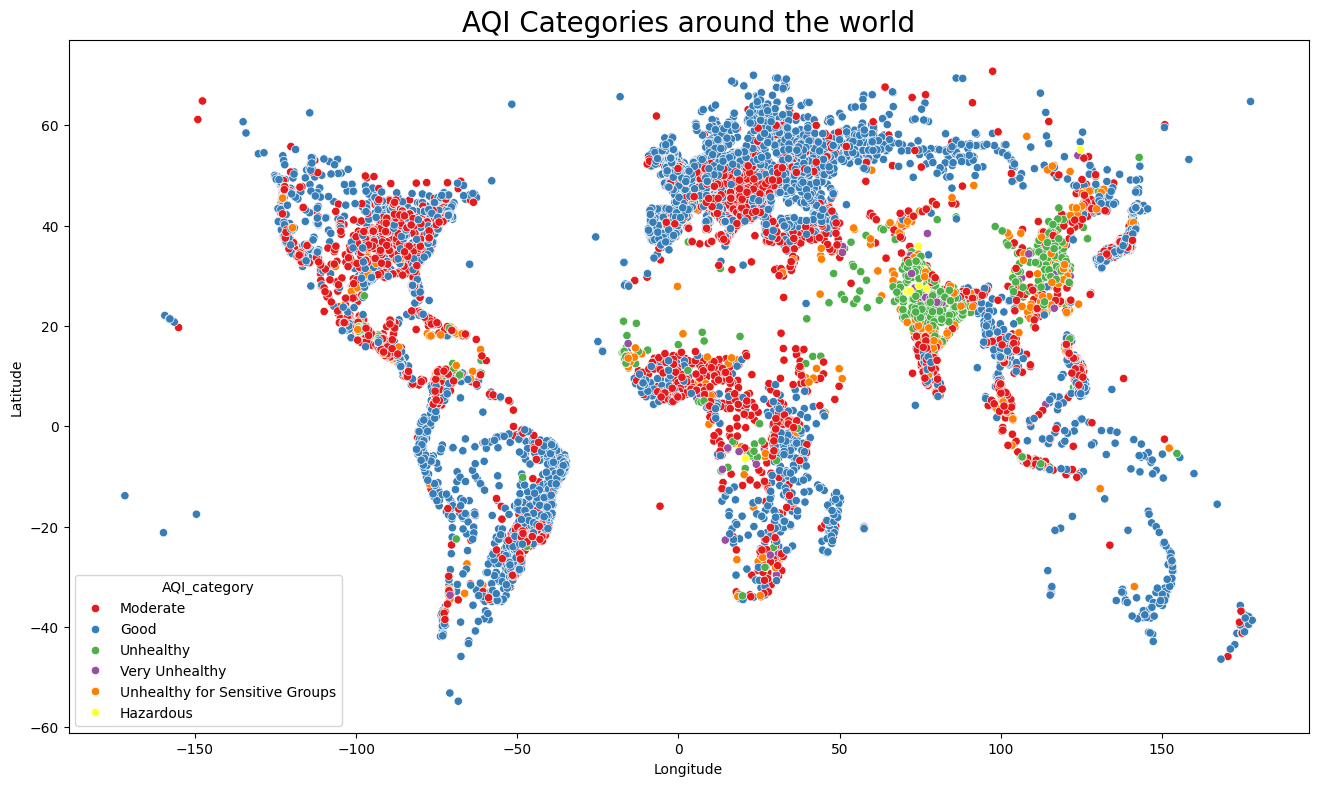

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI_category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Algoritma

In [ ]:
ozoneCate = pd.get_dummies(df['Ozone_AQI_category'],prefix="Ozone")
df=pd.concat([df,ozoneCate],axis=1)
df.drop(['Ozone_AQI_category'],axis=1,inplace=True)

In [ ]:
df.head()

,Country,City,AQI_value,AQI_category,CO_AQI_value,Ozone_AQI_value,NO2_AQI_value,PM2.5_AQI_value,PM2.5_AQI_category,lat,lng,Ozone_Good,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy
0,Russian Federation,Praskoveya,51,Moderate,1,36,0,51,Moderate,44.7444,44.2031,True,False,False,False,False
1,Brazil,Presidente Dutra,41,Good,1,5,1,41,Good,-5.2900,-44.4900,True,False,False,False,False
3,Italy,Priolo Gargallo,66,Moderate,1,39,2,66,Moderate,37.1667,15.1833,True,False,False,False,False
4,Poland,Przasnysz,34,Good,1,34,0,20,Good,53.0167,20.8833,True,False,False,False,False
5,United States of America,Punta Gorda,54,Moderate,1,14,11,54,Moderate,16.1005,-88.8074,True,False,False,False,False


In [ ]:
pmCate = pd.get_dummies(df['PM2.5_AQI_category'],prefix='PM2.5')
df = pd.concat([df,pmCate],axis=1)
df.drop(['PM2.5_AQI_category'],axis=1,inplace=True)

In [ ]:
df.head()

,Country,City,AQI_value,AQI_category,CO_AQI_value,Ozone_AQI_value,NO2_AQI_value,PM2.5_AQI_value,lat,lng,...,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy,PM2.5_Good,PM2.5_Hazardous,PM2.5_Moderate,PM2.5_Unhealthy,PM2.5_Unhealthy for Sensitive Groups,PM2.5_Very Unhealthy
0,Russian Federation,Praskoveya,51,Moderate,1,36,0,51,44.7444,44.2031,...,False,False,False,False,False,False,True,False,False,False
1,Brazil,Presidente Dutra,41,Good,1,5,1,41,-5.2900,-44.4900,...,False,False,False,False,True,False,False,False,False,False
3,Italy,Priolo Gargallo,66,Moderate,1,39,2,66,37.1667,15.1833,...,False,False,False,False,False,False,True,False,False,False
4,Poland,Przasnysz,34,Good,1,34,0,20,53.0167,20.8833,...,False,False,False,False,True,False,False,False,False,False
5,United States of America,Punta Gorda,54,Moderate,1,14,11,54,16.1005,-88.8074,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.drop(['City','Country'],axis=1,inplace=True)
df.head()

,AQI_value,AQI_category,CO_AQI_value,Ozone_AQI_value,NO2_AQI_value,PM2.5_AQI_value,lat,lng,Ozone_Good,Ozone_Moderate,Ozone_Unhealthy,Ozone_Unhealthy for Sensitive Groups,Ozone_Very Unhealthy,PM2.5_Good,PM2.5_Hazardous,PM2.5_Moderate,PM2.5_Unhealthy,PM2.5_Unhealthy for Sensitive Groups,PM2.5_Very Unhealthy
0,51,Moderate,1,36,0,51,44.7444,44.2031,True,False,False,False,False,False,False,True,False,False,False
1,41,Good,1,5,1,41,-5.2900,-44.4900,True,False,False,False,False,True,False,False,False,False,False
3,66,Moderate,1,39,2,66,37.1667,15.1833,True,False,False,False,False,False,False,True,False,False,False
4,34,Good,1,34,0,20,53.0167,20.8833,True,False,False,False,False,True,False,False,False,False,False
5,54,Moderate,1,14,11,54,16.1005,-88.8074,True,False,False,False,False,False,False,True,False,False,False


In [ ]:
#split data into testing and training sets
X=df.drop('AQI_category',axis=1)
y=df['AQI_category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [ ]:
def makePipe(model,name):
    '''
    Makes a pipeline with normalization and classification steps
    Fits the training data and label to the model
    '''


    pipeline = Pipeline([
        ('Scale',Normalizer()),
        ('classifier',model())
    ])

    normalized_x_test = pd.DataFrame(
        Normalizer().fit_transform(X_test),
        columns = X_test.columns)


    pipeline.fit(X_train,y_train)
    preds = pipeline.predict(normalized_x_test)

    print('Classifier: ' ,name)


    plotConfusionMatrix(preds,pipeline.classes_)

    eva = evaluation(preds)

    validation(pipeline)



def evaluation(preds):
    '''
    Prints out Classification reportand accuracy score
    '''
    print('\n',classification_report(y_test,preds))
    print('\nTraining Accuracy Score: ',accuracy_score(y_test,preds))
    return (accuracy_score(y_test,preds))

def plotConfusionMatrix(preds,classes):


    cm=confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
    fig =plt.figure(figsize=(20,8))
    disp.plot()
    plt.xticks(rotation = 75, ha = 'right')
    plt.title('Confusion Matrix')


def validation(model):
    '''
    Prints out Cross validation 5 folds accuracy and std
    '''
    scores = cross_val_score(model,X_train,y_train,cv=5)
    print('Cross Validation Accuracy: %0.2f (+/- %0.2f)'%(scores.mean(),scores.std()*2))

Classifier:  Decision Tree

                                 precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      2003
                     Hazardous       0.88      1.00      0.93        21
                      Moderate       1.00      1.00      1.00      1752
                     Unhealthy       1.00      1.00      1.00       227
Unhealthy for Sensitive Groups       1.00      1.00      1.00       230
                Very Unhealthy       1.00      0.92      0.96        36

                      accuracy                           1.00      4269
                     macro avg       0.98      0.99      0.98      4269
                  weighted avg       1.00      1.00      1.00      4269


Training Accuracy Score:  0.9983602717263996
Cross Validation Accuracy: 1.00 (+/- 0.00)


<Figure size 2000x800 with 0 Axes>

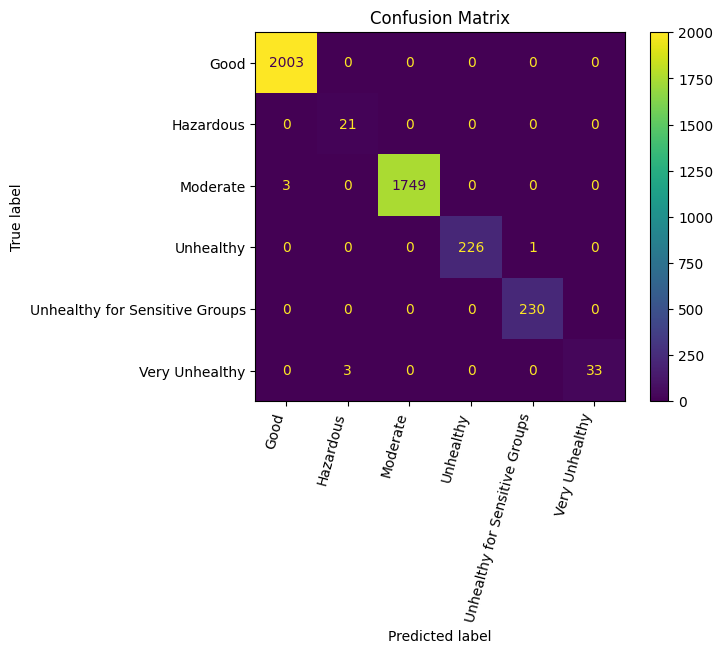

In [ ]:
dtPipe=makePipe(DecisionTreeClassifier,'Decision Tree')

Classifier:  Gaussian Naive Bayes

                                 precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      2003
                     Hazardous       0.75      1.00      0.86        21
                      Moderate       1.00      1.00      1.00      1752
                     Unhealthy       1.00      1.00      1.00       227
Unhealthy for Sensitive Groups       1.00      1.00      1.00       230
                Very Unhealthy       0.97      0.81      0.88        36

                      accuracy                           1.00      4269
                     macro avg       0.95      0.97      0.96      4269
                  weighted avg       1.00      1.00      1.00      4269


Training Accuracy Score:  0.9978917779339423
Cross Validation Accuracy: 1.00 (+/- 0.00)


<Figure size 2000x800 with 0 Axes>

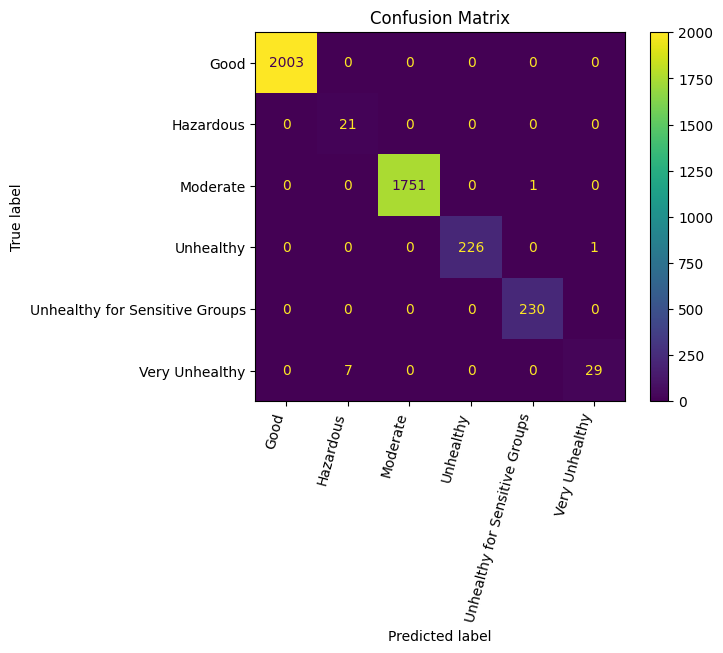

In [ ]:
nbPipe = makePipe(GaussianNB, 'Gaussian Naive Bayes')

Classifier:  Support Vector Machine


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



                                 precision    recall  f1-score   support

                          Good       0.95      0.91      0.93      2003
                     Hazardous       0.00      0.00      0.00        21
                      Moderate       0.84      0.91      0.87      1752
                     Unhealthy       0.48      0.83      0.61       227
Unhealthy for Sensitive Groups       0.58      0.16      0.25       230
                Very Unhealthy       0.00      0.00      0.00        36

                      accuracy                           0.85      4269
                     macro avg       0.47      0.47      0.44      4269
                  weighted avg       0.85      0.85      0.84      4269


Training Accuracy Score:  0.8510189739985945
Cross Validation Accuracy: 0.84 (+/- 0.02)


<Figure size 2000x800 with 0 Axes>

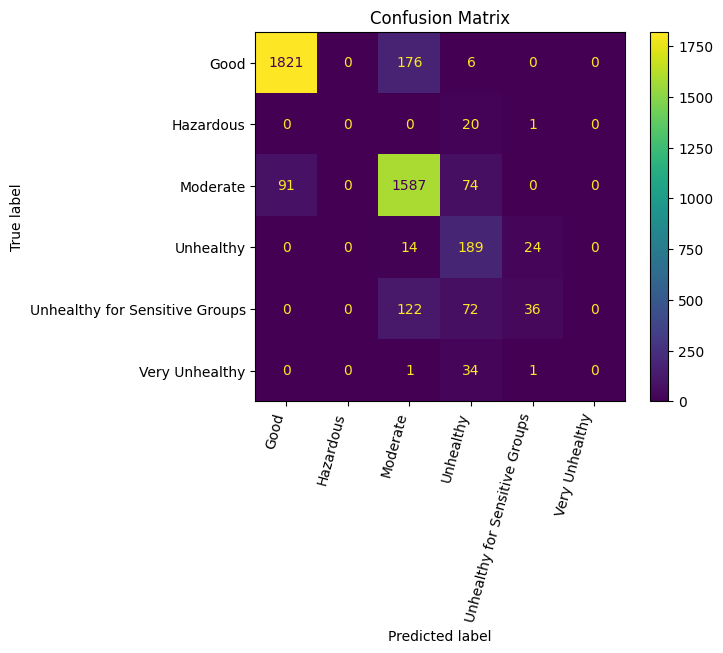

In [ ]:
svmPipe = makePipe(SVC,'Support Vector Machine')

In [ ]:
res={'testAcc':[0.999,0.86,1.0],'valAcc':[0.84,1,1]}
names=['Naive Bayes','SVM','Decision Tree']
a =  pd.DataFrame(res,index=names)
a.head()

,testAcc,valAcc
Naive Bayes,0.999,0.84
SVM,0.860,1.00
Decision Tree,1.000,1.00
